# Exploratory Analysis of Prosper Loan Data
## by Paul Zebarth

## Investigation Overview

> The goal of this investigation is to try and determine the factors that affect borrower rate.

## Dataset Overview

> We are using the prosper loan dataset contained in the file 'prosperLoanData.csv' and using 'Prosper Loan Data - Variable Definitions.xlsx' for the definiton of variables. The dataset consists of 81 columns and 113937 entries. It contains the data types: object, int64, float64, and bool.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

## Credit Grade Counts vs Borrower Rate

> We will see that credit score does correlate to a lower borrower rate. Credit grades AA, A, B, C and D are all right skewed towards lower borrower rates. Credit E, HR, and NC are left skewed to higher borrower rates.

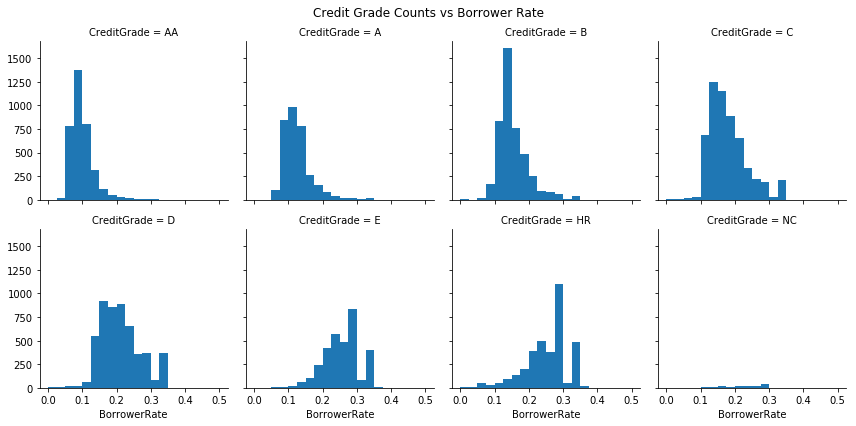

In [21]:
# credit grade is an ordinal qualitative variable so we will order it accordingly
credit_grade= ['AA','A','B','C','D','E','HR','NC']
credit_grade_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=credit_grade)
df['CreditGrade']=df['CreditGrade'].astype(credit_grade_ordered)
# choosing bin size
bins=np.arange(0,df.BorrowerRate.max()+0.025,0.025)
# plotting facet grid
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.hist,'BorrowerRate',bins=bins)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Credit Grade Counts vs Borrower Rate');

## Prosper Rating Counts vs Borrower Rate

> We will see that prosper rating does correlate to a lower borrower rate. Credit grades AA, A, B, C and D are all right skewed towards lower borrower rates. Credit E and HR are left skewed to higher borrower rates. By visual inspection we can see the prosper rating has a high effect on the borrower rate as compared to the credit grade. The propser rating has a smaller standard devitation and relates to a small variation in borrower rate. This makes is a good indicator of borrower rate.

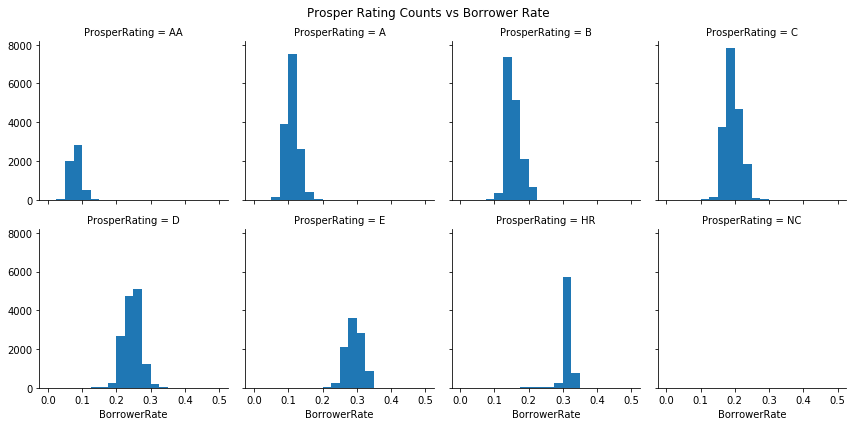

In [26]:
# creating a dictionary for corresponing credit grade
df.replace(to_replace={"ProsperRating (numeric)": {0: "NC", 1: "HR", 2: "E",
                                                   3: "D", 4: "C",5: "B",
                                                   6: "A", 7: "AA",}}, inplace=True)
# renaming column so its easier to call
df.rename(index=str, columns={"ProsperRating (numeric)": "ProsperRating"}, inplace=True)
# prosper rating is an ordinal qualitative variable so we will order it accordingly
prosper_rating= ['AA','A','B','C','D','E','HR','NC']
prosper_rating_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=prosper_rating)
df['ProsperRating']=df['ProsperRating'].astype(prosper_rating_ordered)
# choosing bin size
bins=np.arange(0,df.BorrowerRate.max()+0.025,0.025)
# plotting facet grid
g=sb.FacetGrid(data=df,col='ProsperRating',col_wrap=4)
g.map(plt.hist,'BorrowerRate',bins=bins)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Prosper Rating Counts vs Borrower Rate');

## Plot Matrix of Quantitative Variables

> Comparing the following variables in a plot matrix we will identify trends  of interest between:'BorrowerRate','Investors','LoanOriginalAmount','DebtToIncomeRatio','Term',and 'AmountDelinquent'

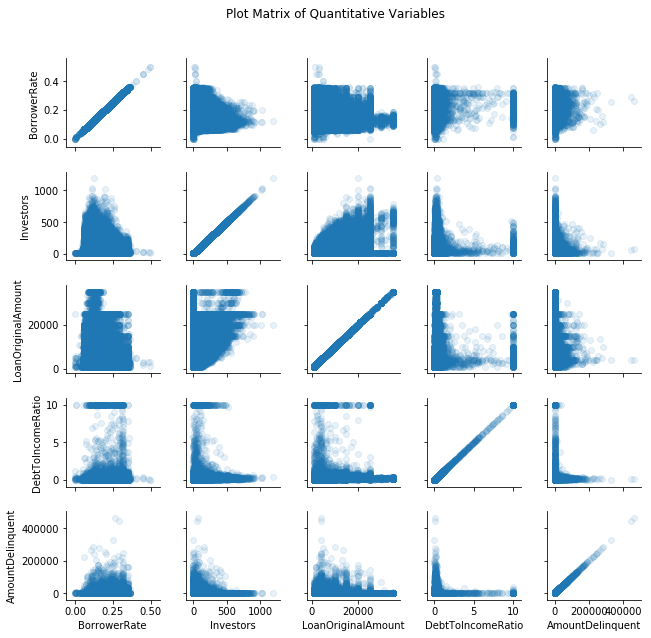

In [12]:
quant_vars=['BorrowerRate','Investors','LoanOriginalAmount','DebtToIncomeRatio','AmountDelinquent']
g=sb.PairGrid(data=df,vars=quant_vars,height=1.8, aspect=1)
g.map(plt.scatter,alpha=0.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Plot Matrix of Quantitative Variables');

## Heat Map of Quantitative Variables Correlation

>We are interested in borrower rate so we will look across the top row or first column and see none of the variables have a strong correlation to borrower rate. However, debt to income ratio has the highest correlation and the amount of investors has the highest correlation to original loan amount out of a comparison of all the variables. Term and original loan amount also seem to be correlated.

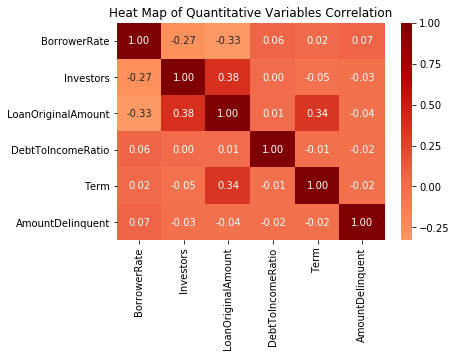

In [32]:
sb.heatmap(df[quant_vars].corr(), annot = True, fmt = '.2f', cmap = 'OrRd', center = -0.25)
ax = plt.axes()
ax.set_title('Heat Map of Quantitative Variables Correlation');

## Interesting Results

## Proportional Loan Usage

>We will see that majority of the loans are being used for debt. This would explain why it was hard to find variabes that affect borrower rate. They may use formula to compute borrower rates for different loan usage.

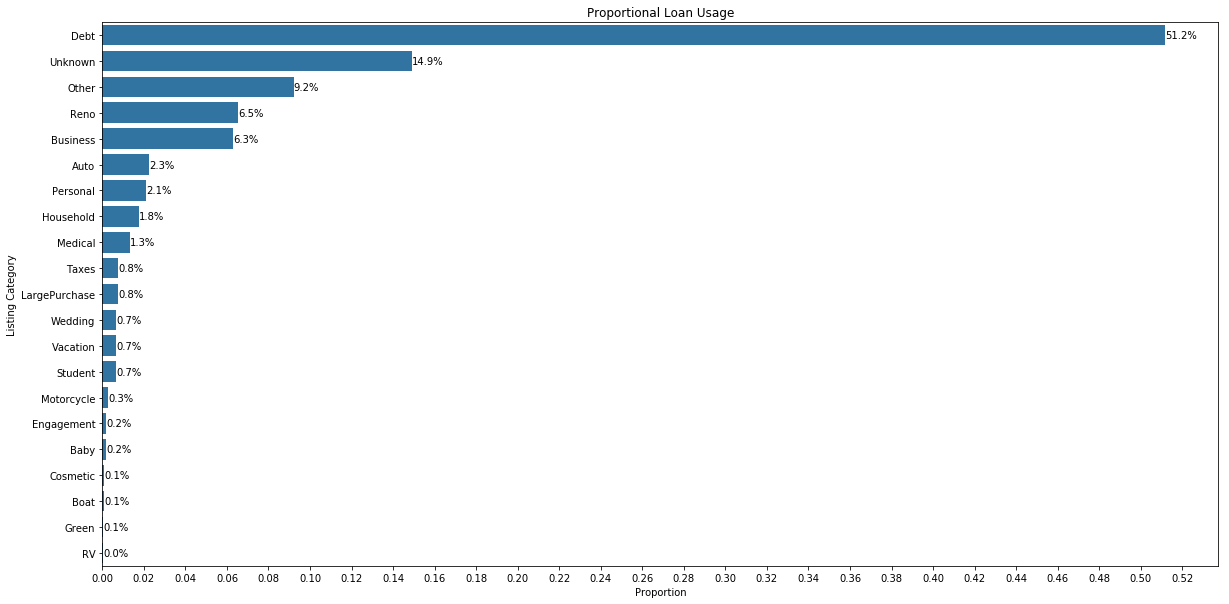

In [33]:
# creating a dictionary for corresponing listing category
df.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno",
                                                     3: "Business", 4: "Personal",5: "Student",
                                                     6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                     10: "Cosmetic", 11: "Engagement", 12: "Green", 
                                                     13: "Household",14: "LargePurchase", 15: "Medical",
                                                     16: "Motorcycle", 17: "RV",18: "Taxes", 19: "Vacation",
                                                     20: "Wedding"}}, inplace=True)
# renaming column so its easier to call
df.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)
#setting the base colour for future plots
base_color= sb.color_palette()[0]
# making the plot proportional
type_counts = df['ListingCategory'].value_counts()
type_order = type_counts.index
n_Loans = df.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_Loans
# setting values for x axis ticks
tick_props = np.arange(0, max_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# plotting figure
plt.figure(figsize=(20,10))
sb.countplot(data = df, y = 'ListingCategory', color = base_color, order = type_order)
# plotting percentages on bars
for i in range(type_counts.shape[0]):
    count=type_counts[i]
    pct_string='{:0.1f}%'.format(100*count/n_Loans)
    plt.text(count+1,i,pct_string,va='center')
# polishing plot by adding xticks labels and a title
plt.xticks(tick_props * n_Loans, tick_names)
plt.xlabel('Proportion')
plt.ylabel('Listing Category')
plt.title('Proportional Loan Usage');

## Borrower Rate vs Days of Loan Delinquency Categorized By Credit Grade/Prosper Rating

>We will see that these facet plots show borrower rate does have alot of standard values depending on the amount of deliquent days or credit grade/prosper rating and the borrower rate shifts higher the lower the credit grade/prosper rating. This makes sense and we would assume the contract for the loan would have a borrower rate for being delinquent.

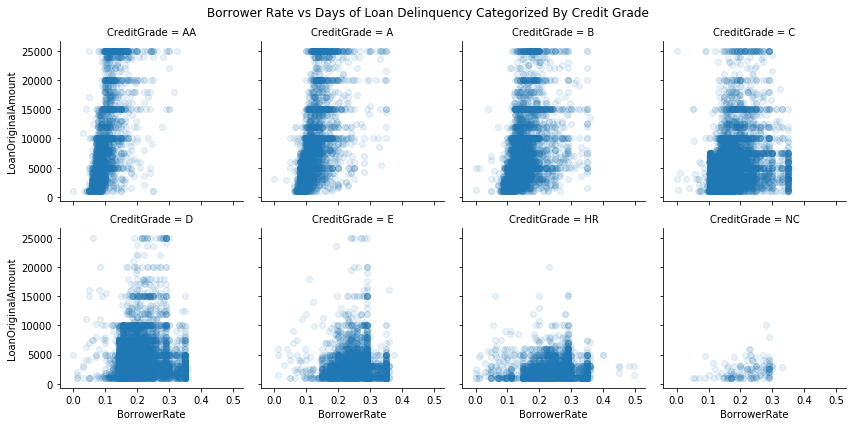

In [36]:
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanOriginalAmount',alpha=0.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate vs Days of Loan Delinquency Categorized By Credit Grade');

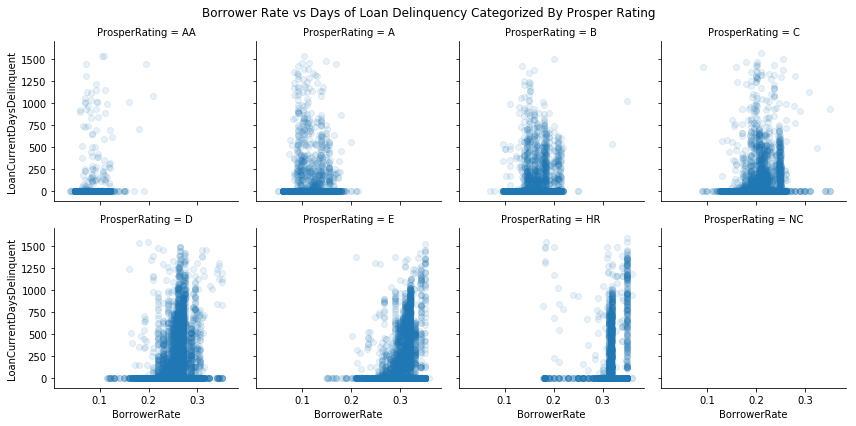

In [35]:
g=sb.FacetGrid(data=df,col='ProsperRating',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanCurrentDaysDelinquent',alpha=0.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate vs Days of Loan Delinquency Categorized By Prosper Rating');

## Borrower Rate vs Oiginal Loan Amount By Credit Grade/Prosper Rating

>We will see that from these facet plots the amount each credit grade/prosper rating can secure a loan for changes. The lower the credit grade/prosper rating the lower the maximum loan amount they can secure and the borrower rate shifts higher the lower the credit grade/prosper rating.

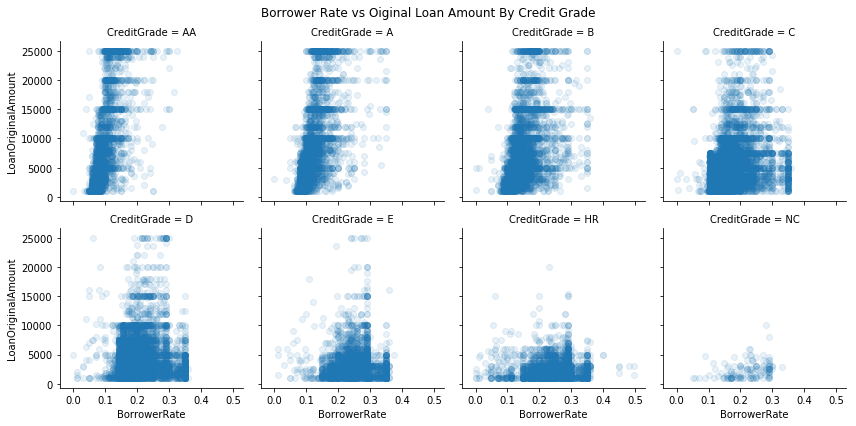

In [37]:
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanOriginalAmount',alpha=0.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate vs Oiginal Loan Amount By Credit Grade');

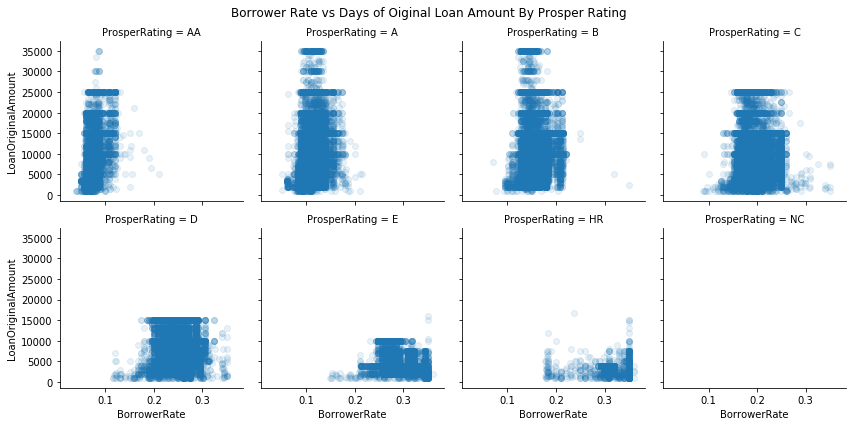

In [38]:
g=sb.FacetGrid(data=df,col='ProsperRating',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanOriginalAmount',alpha=0.1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate vs Days of Oiginal Loan Amount By Prosper Rating');

## Conclusion

>After this analysis it seems the variables used to try and determine how borrower rate was affected did not work. The best indicator we could use to determine borrower rate was the prosper rating. What would have made a better investigation is seeing what variables affect prosper rating.

>It is intersting but not surprising that there were alot of standard borrower rates for delinquent accounts. Another interesting result in the visuals but not a surprising one is that that credit grade/prosper rating changed the amount in which you could secure a loan.

>From the terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through the
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide.